# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Laptop Prices Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-info alert-warning ">

# <span style=" color:red"> Laptop Prices Project
</span>

Welcome to the data analysis assignment on laptop prices! In this assignment, we will work with a dataset containing information about various laptops. The dataset includes several features detailing laptop specifications, such as brand, type, screen size, hardware details, and price. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).



Company- String -Laptop Manufacturer
TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
Inches -Numeric- Screen Size
ScreenResolution -String- Screen Resolution
Cpu- String -Central Processing Unit (CPU)
Ram -String- Laptop RAM
Memory -String- Hard Disk / SSD Memory
GPU -String- Graphics Processing Units (GPU)
OpSys -String- Operating System
Weight -String- Laptop Weight
Price_euros -Numeric- Price (Euro)

In [217]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
import scipy.stats as stats
from tabulate import tabulate
import matplotlib.ticker as mtick
import re 
import math

import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [10]:
df0 = pd.read_csv("laptop_data.csv")
df = df0.copy()
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
def column_info(df):
    """
    Generate summary information for each column in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame containing summary information for each column.
    """
    info = []
    for col in df.columns:
        data_type = df[col].dtype
        count = len(df[col])
        nan_count = df[col].isnull().sum()
        nan_percent = (nan_count / count * 100) if count > 0 else 0 
        unique_count = df[col].nunique()

        if pd.api.types.is_numeric_dtype(df[col]):
            max_value = df[col].max()
            min_value = df[col].min()
            sample_value = df[col].dropna().sample(n=1, random_state=42).iloc[0] if count - nan_count > 0 else None
        else:
            sample_value = df[col].dropna().sample(n=1, random_state=42).iloc[0] if count - nan_count > 0 else None
            max_value = 'no value'
            min_value = 'no value'
   

        info.append({
            'Column_name': col,
            'Data_Type': data_type,
            'Count': count,
            'NaN_Count': nan_count,
            'NaN_Percent': nan_percent,
            'Unique_Count': unique_count,
            'Max_Value': max_value,
            'Min_Value': min_value,
            'Sample_Value': sample_value
        })

    return pd.DataFrame(info)

In [18]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,NaN_Percent,Unique_Count,Max_Value,Min_Value,Sample_Value
0,Unnamed: 0,int64,1303,0,0.0,1303,1302,0,479
1,Company,object,1303,0,0.0,19,no value,no value,Toshiba
2,TypeName,object,1303,0,0.0,6,no value,no value,Notebook
3,Inches,float64,1303,0,0.0,18,18.4,10.1,13.3
4,ScreenResolution,object,1303,0,0.0,40,no value,no value,IPS Panel Full HD 1920x1080
5,Cpu,object,1303,0,0.0,118,no value,no value,Intel Core i5 7200U 2.5GHz
6,Ram,object,1303,0,0.0,9,no value,no value,8GB
7,Memory,object,1303,0,0.0,39,no value,no value,256GB SSD
8,Gpu,object,1303,0,0.0,110,no value,no value,Intel HD Graphics 620
9,OpSys,object,1303,0,0.0,9,no value,no value,Windows 10


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [22]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [24]:
df.shape

(1303, 12)

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

<div class="alert alert-block alert-success">

### <span style=" color:red"> Remove unnecessary columns:
</span>

- Drop the Unnamed: 0 column as it seems to be an index column.

In [26]:
#unnamed column was removed because it is the same as the index column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for duplicates and missing values:

- Identify and remove any duplicate rows from the dataset.

- Check for missing values in the dataset.

In [29]:
# distribution of missing data reviewed. no missing data found.
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [31]:
#duplicate data checked. duplicate data found.
df.duplicated().sum()

29

In [33]:
df = df.drop_duplicates()
df.duplicated().sum()

0

<div class="alert alert-block alert-success">

### <span style=" color:red"> Standardize data formats:

- Convert Weight to a numeric column (strip the "kg" and convert to float) etc. Apply similar operations to other required columns. You may consider adding new features.

- Verify the data types of each column and convert them to appropriate formats if necessary.

In [36]:
#Removed GB from each row and added it to the column name instead. And converted the data type of the “Ram” column to float
df['Ram']=df['Ram'].str.replace("GB","")
df['Ram']=df['Ram'].astype(float)
df.rename(columns={'Ram': 'Ram(GB)'}, inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4.0,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [38]:
#Removed kg from each row and added it to the column name instead. And converted the data type of the “Ram” column to float
df['Weight']=df['Weight'].str.replace("kg","")
df['Weight']=df['Weight'].astype(float)
df.rename(columns={'Weight': 'Weight(kg)'}, inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4.0,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


<div class="alert alert-block alert-success">

### <span style=" color:red"> Clean categorical columns:

- Ensure consistent formatting in Company, TypeName, and OpSys columns (e.g., no leading/trailing spaces, proper case).

- Simplify OpSys categories if there are too many unique values (e.g., group similar OS types).

In [41]:
df["Company"].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [43]:
df["TypeName"].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [45]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [47]:
#regrouped by operating systems into windows, mac os and others (Linux, Android, No OS, Chrome OS)
def group_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'macOS' in os or 'Mac OS X' in os:
        return 'MacOS'
    elif 'Linux' in os:
        return 'Linux'    
    elif os in ['Android', 'No OS','Chrome OS']:
        return 'Other'
    else:
        return 'Unknown'

df['OpSys_Grouped'] = df['OpSys'].apply(group_os)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,OpSys_Grouped
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,MacOS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,MacOS
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,MacOS
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,MacOS


In [49]:
df["OpSys_Grouped"].value_counts()

OpSys_Grouped
Windows    1100
Other        95
Linux        58
MacOS        21
Name: count, dtype: int64

<div class="alert alert-block alert-success">

### <span style=" color:red"> Split compound columns:

- Parse ScreenResolution to extract key features such as:
- Resolution (e.g., Full HD, 4K)
- Touchscreen (Yes/No)
- Extract details from Cpu and Gpu columns, such as manufacturer or core type.

In [52]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

SCREENRESOLUTİON 

In [55]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['ScreenType'] = df['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,OpSys_Grouped,Resolution,ScreenType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,MacOS,2560x1600,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,MacOS,1440x900,
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,MacOS,2880x1800,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,MacOS,2560x1600,IPS Panel Retina Display
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,Windows,1366x768,
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,MacOS,2880x1800,IPS Panel Retina Display
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,MacOS,1440x900,
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,Windows,1920x1080,Full HD
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,Windows,1920x1080,IPS Panel Full HD


In [57]:
df["Resolution"].value_counts()

Resolution
1920x1080    833
1366x768     289
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [59]:
df["ScreenType"].value_counts()

ScreenType
Full HD                                 505
                                        295
IPS Panel Full HD                       231
IPS Panel Full HD / Touchscreen          51
Full HD / Touchscreen                    47
Touchscreen                              32
IPS Panel Retina Display                 17
Quad HD+ / Touchscreen                   15
IPS Panel Touchscreen                    13
IPS Panel 4K Ultra HD                    12
IPS Panel 4K Ultra HD / Touchscreen      11
IPS Panel                                11
4K Ultra HD / Touchscreen                10
4K Ultra HD                               7
IPS Panel Quad HD+                        5
IPS Panel Quad HD+ / Touchscreen          4
Quad HD+                                  3
IPS Panel Touchscreen / 4K Ultra HD       2
Touchscreen / Quad HD+                    1
Touchscreen / Full HD                     1
Touchscreen / 4K Ultra HD                 1
Name: count, dtype: int64

In [61]:
# Insert new columns
conditions = [
    df['ScreenType'].str.contains('Full HD', na=False),
    df['ScreenType'].str.contains('Quad HD+', na=False),
    df['ScreenType'].str.contains('Quad HD', na=False),
    df['ScreenType'].str.contains('4K Ultra HD', na=False)
]

choices = ['Full HD', 'Quad HD+', 'Quad HD', '4K Ultra HD']
df['ScreenCategory'] = np.select(conditions, choices, default='Other')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,OpSys_Grouped,Resolution,ScreenType,ScreenCategory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,MacOS,2560x1600,IPS Panel Retina Display,Other
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,MacOS,1440x900,,Other
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080,Full HD,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,MacOS,2880x1800,IPS Panel Retina Display,Other
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,MacOS,2560x1600,IPS Panel Retina Display,Other


In [63]:
df['TouchScreen'] = df['ScreenType'].str.extract(r'(Touchscreen)')
df['ScreenType'] = df['ScreenType'].replace(r'(Touchscreen)','',regex=True)

In [65]:
df['TouchScreen'].value_counts()

TouchScreen
Touchscreen    188
Name: count, dtype: int64

In [67]:
df['TouchScreen'] = df['TouchScreen'].replace('TouchScreen','Touchscreen')
df['TouchScreen'] = df['TouchScreen'].replace(np.nan,'No Touchscreen')
df['TouchScreen'].value_counts()

TouchScreen
No Touchscreen    1086
Touchscreen        188
Name: count, dtype: int64

In [69]:
df['ScreenType'].value_counts()

ScreenType
Full HD                      505
                             295
IPS Panel Full HD            231
IPS Panel Full HD /           51
Full HD /                     47
                              32
IPS Panel Retina Display      17
Quad HD+ /                    15
IPS Panel                     13
IPS Panel 4K Ultra HD         12
IPS Panel 4K Ultra HD /       11
IPS Panel                     11
4K Ultra HD /                 10
4K Ultra HD                    7
IPS Panel Quad HD+             5
IPS Panel Quad HD+ /           4
Quad HD+                       3
IPS Panel  / 4K Ultra HD       2
 / Quad HD+                    1
 / Full HD                     1
 / 4K Ultra HD                 1
Name: count, dtype: int64

In [186]:
#df['ScreenType'] = df['ScreenType'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [188]:
#df['ScreenType'].value_counts()

ScreenType
                             547
                             295
IPS Panel                    261
                              75
IPS Panel                     68
IPS Panel Retina Display      17
IPS Panel                     11
Name: count, dtype: int64

In [71]:
#df['ScreenType']=df['ScreenType'].replace(r'^\s*$', np.nan, regex=True)
#df['ScreenType'].value_counts()

In [192]:
#df['ScreenType']=df['ScreenType'].replace(r' ','',regex=True)
#df['ScreenType'].value_counts()

ScreenType
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

CPU


In [73]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [75]:
df['CpuFreq'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

In [77]:
df['CpuFreq'].value_counts()

CpuFreq
2.5GHz     282
2.8GHz     165
2.7GHz     163
1.6GHz     122
2.3GHz      86
1.8GHz      78
2.6GHz      74
2GHz        67
1.1GHz      53
2.4GHz      50
3GHz        19
2.9GHz      19
2.0GHz      19
1.2GHz      15
1.44GHz     12
2.2GHz      11
1.5GHz      10
1.3GHz       6
3.6GHz       5
3.1GHz       3
2.1GHz       3
2.50GHz      3
1.9GHz       2
0.9GHz       2
1.60GHz      1
3.2GHz       1
1.0GHz       1
1.92GHz      1
2.70GHz      1
Name: count, dtype: int64

In [79]:
df['CpuFreq'] = df['CpuFreq'].str.replace('GHz', '')
df.rename(columns={'CpuFreq': 'CpuFreq(GHz)'}, inplace=True)
df['CpuFreq(GHz)'] = df['CpuFreq(GHz)'].astype(float)

In [81]:
df['Cpu']= df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,OpSys_Grouped,Resolution,ScreenType,ScreenCategory,TouchScreen,CpuFreq(GHz)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,MacOS,2560x1600,IPS Panel Retina Display,Other,No Touchscreen,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,MacOS,1440x900,,Other,No Touchscreen,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080,Full HD,Full HD,No Touchscreen,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,MacOS,2880x1800,IPS Panel Retina Display,Other,No Touchscreen,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,MacOS,2560x1600,IPS Panel Retina Display,Other,No Touchscreen,3.1


In [83]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U      193
Intel Core i7 7700HQ     147
Intel Core i7 7500U      133
Intel Core i3 6006U       81
Intel Core i7 8550U       73
                        ... 
Intel Core M m3            1
AMD E-Series E2-9000       1
Intel Core M M3-6Y30       1
AMD A6-Series 7310         1
AMD A9-Series 9410         1
Name: count, Length: 93, dtype: int64

In [85]:
df['CpuBrand'] = df['Cpu'].str.extract(r'^(\w+)')
df['CpuBrand'].value_counts()

CpuBrand
Intel      1213
AMD          60
Samsung       1
Name: count, dtype: int64

In [87]:
df[df['CpuBrand']=='Samsung']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,OpSys_Grouped,Resolution,ScreenType,ScreenCategory,TouchScreen,CpuFreq(GHz),CpuBrand
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53,4.0,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,Other,2400x1600,IPS Panel,Other,Touchscreen,2.0,Samsung


In [89]:
df=df.drop(1191)

GPU

In [92]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: count, Length: 109, dtype: int64

In [94]:
df['GpuBrand'] = df['Gpu'].str.extract(r'^(\w+)')
df['GpuBrand'].value_counts()

GpuBrand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

MEMORY

In [97]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [99]:
df['Memory_1']=df['Memory']

In [101]:
df['Memory_1']=df['Memory_1'].str.replace('1.0TB','1TB', regex=True)
df['Memory_1']=df['Memory_1'].str.replace('1TB','1000GB')
df['Memory_1']=df['Memory_1'].str.replace('2TB','2000GB')
df['Memory_1']=df['Memory_1'].str.replace('GB','')
df['Memory_1'].value_counts()

Memory_1
256 SSD                         412
1000 HDD                        216
500 HDD                         123
512 SSD                         114
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              73
32 Flash Storage                 35
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         14
64 Flash Storage                 13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
16 Flash Storage                  7
1000 Hybrid                       7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD 

In [103]:
df['Memory2']=df['Memory_1'].str.replace(r' ','')
df['Memory2'].value_counts()

Memory2
256SSD                    412
1000HDD                   216
500HDD                    123
512SSD                    114
128SSD+1000HDD             94
128SSD                     74
256SSD+1000HDD             73
32FlashStorage             35
2000HDD                    16
512SSD+1000HDD             14
1000SSD                    14
64FlashStorage             13
256SSD+2000HDD             10
256FlashStorage             8
16FlashStorage              7
1000Hybrid                  7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
24

In [105]:
memory_1=[]
memory_2=[]
for i in df['Memory2']:
    if len(re.findall(r'\+',i))==1: # DOUBLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: # SINGLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')

In [107]:
memory_1_gb=[]
memory_1_type=[]
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [109]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)

In [111]:
df['Memory1Sto(GB)'] = memory_1_gb
df['Memory1Type'] = memory_1_type
df['Memory2Sto(GB)'] = memory_2_gb
df['Memory2Type'] = memory_2_type

In [113]:
df['Memory1Sto(GB)'] = df['Memory1Sto(GB)'].astype(float)
df['Memory2Sto(GB)'] = df['Memory2Sto(GB)'].astype(float)

In [115]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),...,TouchScreen,CpuFreq(GHz),CpuBrand,GpuBrand,Memory_1,Memory2,Memory1Sto(GB),Memory1Type,Memory2Sto(GB),Memory2Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,No Touchscreen,2.3,Intel,Intel,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,No Touchscreen,1.8,Intel,Intel,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,No Touchscreen,2.5,Intel,Intel,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,No Touchscreen,2.7,Intel,AMD,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,No Touchscreen,3.1,Intel,Intel,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [117]:
df=df.drop(['Memory_1','Memory2'], axis=1)

In [119]:
df = df.replace({'NaN': np.nan})

In [121]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),...,ScreenType,ScreenCategory,TouchScreen,CpuFreq(GHz),CpuBrand,GpuBrand,Memory1Sto(GB),Memory1Type,Memory2Sto(GB),Memory2Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,IPS Panel Retina Display,Other,No Touchscreen,2.3,Intel,Intel,128.0,SSD,0.0,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,,Other,No Touchscreen,1.8,Intel,Intel,128.0,FlashStorage,0.0,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,Full HD,Full HD,No Touchscreen,2.5,Intel,Intel,256.0,SSD,0.0,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,IPS Panel Retina Display,Other,No Touchscreen,2.7,Intel,AMD,512.0,SSD,0.0,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,IPS Panel Retina Display,Other,No Touchscreen,3.1,Intel,Intel,256.0,SSD,0.0,NaN


<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for outliers in numerical columns:

- Identify outliers in columns like Inches, Weight, Ram, and Price using methods such as the IQR (Interquartile Range) or z-scores.
- Consider removing or capping the outliers if necessary to improve data quality.

In [124]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,Inches,Ram(GB),Weight(kg),Price,CpuFreq(GHz),Memory1Sto(GB),Memory2Sto(GB)
count,1273.00,1273.00,1273.00,1273.00,1273.0,1273.00,1273.00
mean,15.02,8.45,2.04,60523.13,2.3,439.67,172.25
std,1.43,5.10,0.67,37341.10,0.5,355.84,406.50
min,10.10,2.00,0.69,9270.72,0.9,8.00,0.00
25%,14.00,4.00,1.50,32447.52,2.0,256.00,0.00
50%,15.60,8.00,2.04,52693.92,2.5,256.00,0.00
75%,15.60,8.00,2.31,79813.44,2.7,512.00,0.00
max,18.40,64.00,4.70,324954.72,3.6,2000.00,2000.00


In [127]:
#Outliers are calculated using an IQR of 3.5 to reduce data loss in numerical variables. Outliers by price column were removed from the data as the values in the price column were too high
def remove_price_outliers(df, threshold=3.5):
    """
    Removes outliers from the 'Price' column using the IQR method with a given threshold.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The multiplier for the IQR method. Default is 3.5 (stricter outlier removal).
    
    Returns:
    pd.DataFrame: A cleaned DataFrame without outliers in the 'Price' column.
    """
    
    # Compute Q1, Q3, and IQR for 'Price'
    Q1 = df['Price'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df['Price'].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Remove outliers from 'Price'
    df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

    
    num_removed = df.shape[0] - df_cleaned.shape[0]
    print(f"✅ {num_removed} outliers removed from 'Price' column.")

    return df_cleaned  # Return cleaned DataFrame

df = remove_price_outliers(df)

df['Price'].describe()

✅ 3 outliers removed from 'Price' column.


count      1270.000000
mean      59974.004806
std       35608.838879
min        9270.720000
25%       32447.520000
50%       52667.280000
75%       79624.296000
max      233845.920000
Name: Price, dtype: float64

In [129]:
df_sorted = df.sort_values(by='Price', ascending=False)
df_sorted.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),...,ScreenType,ScreenCategory,TouchScreen,CpuFreq(GHz),CpuBrand,GpuBrand,Memory1Sto(GB),Memory1Type,Memory2Sto(GB),Memory2Type
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5,16.0,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,...,IPS Panel Full HD,Full HD,No Touchscreen,2.9,Intel,Nvidia,256.0,SSD,0.0,NaN
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK,64.0,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,...,IPS Panel Full HD,Full HD,No Touchscreen,2.7,Intel,Nvidia,1000.0,SSD,0.0,NaN
1136,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ,8.0,256GB SSD,Nvidia Quadro M3000M,Windows 7,3.00,...,IPS Panel Full HD,Full HD,No Touchscreen,2.6,Intel,Nvidia,256.0,SSD,0.0,NaN
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,...,Full HD,Full HD,No Touchscreen,2.9,Intel,Nvidia,512.0,SSD,1000.0,HDD
723,Dell,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ,32.0,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,...,4K Ultra HD,4K Ultra HD,No Touchscreen,2.8,Intel,Nvidia,1000.0,SSD,1000.0,HDD


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

<div class="alert alert-block alert-success">

### <span style=" color:red"> Distribution of Price:

- Create a histogram or box plot to visualize the price distribution.

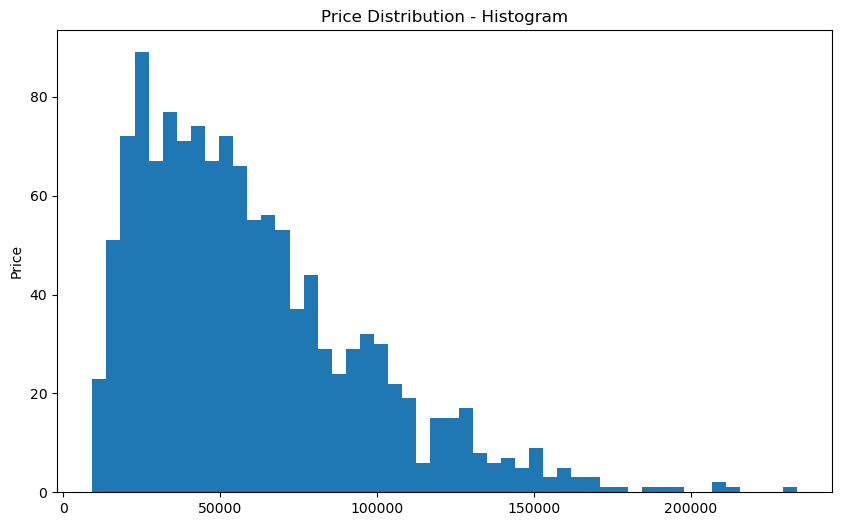

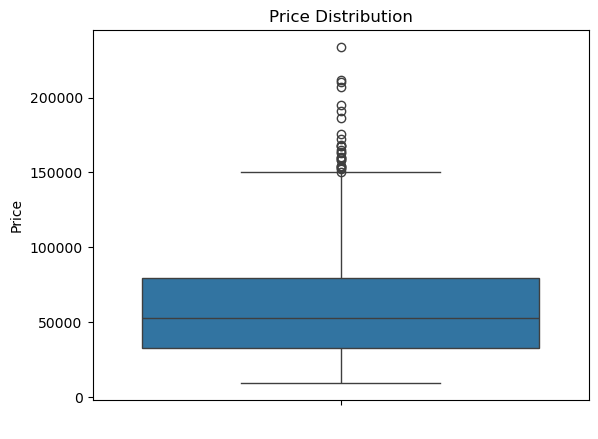

In [133]:
plt.figure(figsize=(10, 6))

plt.hist(df['Price'].dropna(), bins=50)
plt.title("Price Distribution - Histogram")
plt.ylabel("Price")
plt.show()

sns.boxplot( y="Price", data=df,)
plt.title("Price Distribution")
plt.xlabel(" ")
plt.ylabel("Price")
plt.show()

In [135]:
from scipy.stats import shapiro, kstest

# The distribution of the bmi variable was evaluated in the shapiro-wilks test. 
stat, p = shapiro(df['Price'].dropna())
print(f"Shapiro-Wilk Testi: Test İstatistiği = {stat}, p-değeri = {p}")

Shapiro-Wilk Testi: Test İstatistiği = 0.9206930667776275, p-değeri = 2.671183479685558e-25


The distribution is right-skewed, indicating that most prices are concentrated in the lower range.
A few extremely high prices extend the distribution, suggesting the presence of outliers.
The boxplot confirms the presence of outliers, with multiple values above the upper whisker.
Shapiro-Wilk Test for Normality
Since the p-value is extremely low, the null hypothesis (that the data is normally distributed) is rejected.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Company-wise Analysis:

- Plot the count of laptops for each company using a bar chart.
- Visualize the average price of laptops for each company.

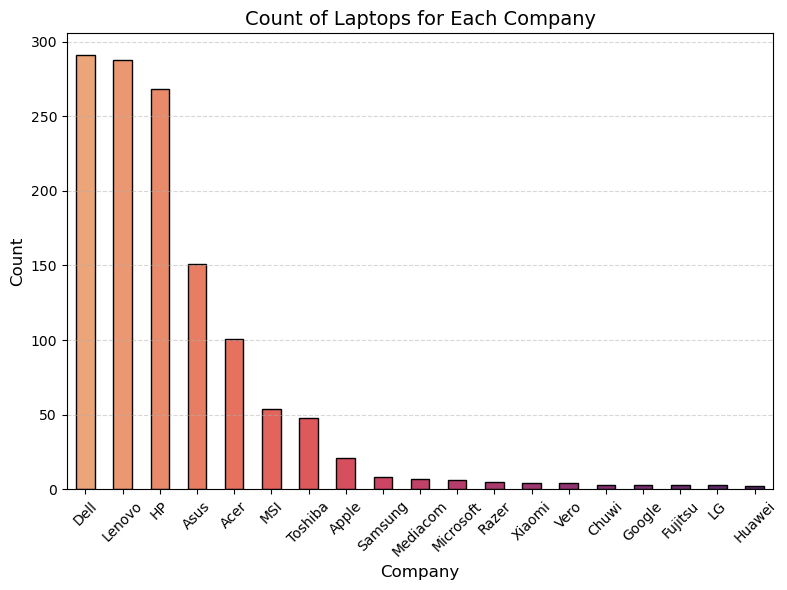

In [139]:
laptop_counts = df['Company'].value_counts()

plt.figure(figsize=(8, 6))
palette = sns.color_palette("flare", len(laptop_counts))
laptop_counts.plot(kind='bar', color=palette, edgecolor='black')

plt.title('Count of Laptops for Each Company', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

Dell, Lenovo, and Asus have the highest number of laptops, making them dominant in the dataset.
Smaller brands like Google, Fujitsu, and Huawei have significantly fewer laptop entries.

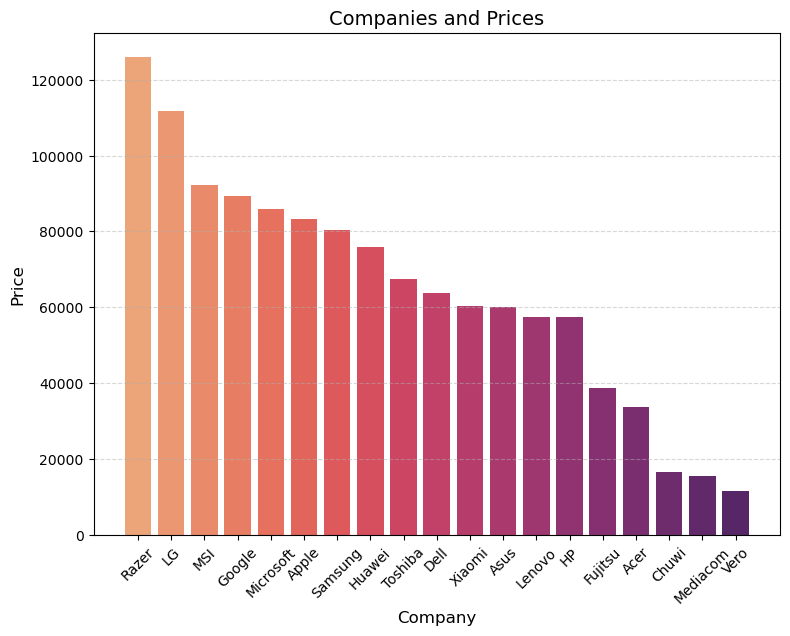

In [142]:
grouped_data = df.groupby("Company")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
palette = sns.color_palette("flare", len(grouped_data))
bars = plt.bar(grouped_data.index, grouped_data.values, color=palette)
plt.title("Companies and Prices", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


The chart displays the mean price of laptops for each company.
Razer, MSI, and Google have the highest average laptop prices.
Acer, Medion, and Vero have the lowest average prices, indicating that they likely focus on budget-friendly models.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Relationship between Screen Size and Price:

- Create a scatter plot showing the relationship between Inches and Price. 

In [146]:

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.kdeplot(data=df, x = "Price", y = "Inches", color = "red", shade = True, ax = ax[0])
sns.scatterplot(data=df, x =  "Price", y = "Inches", color = "red", ax = ax[1]);

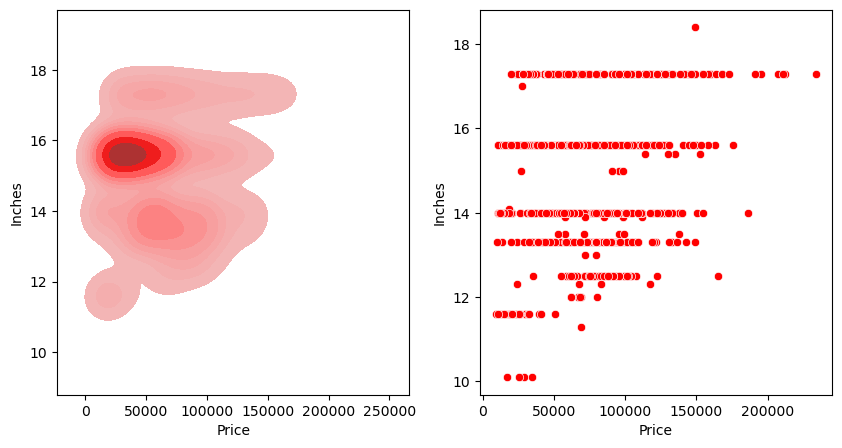

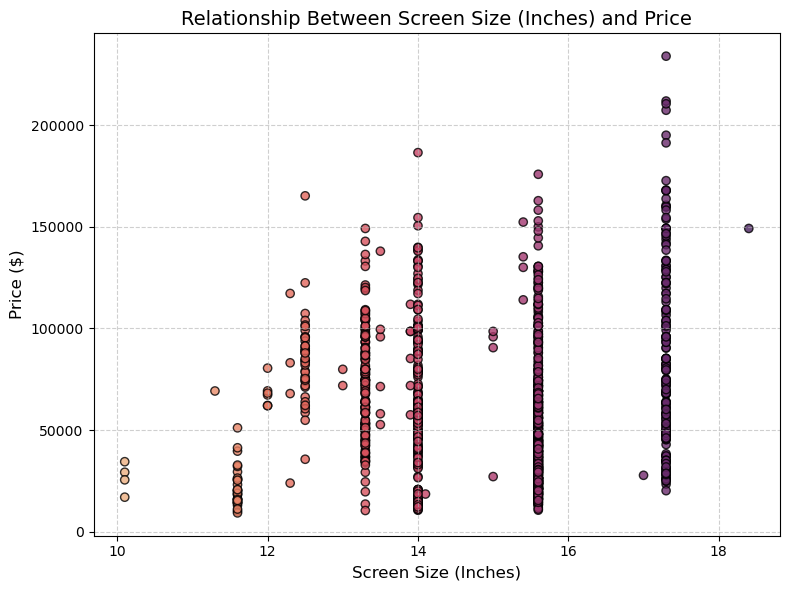

In [148]:

norm = plt.Normalize(df['Inches'].min(), df['Inches'].max())
colors = sns.color_palette("flare", as_cmap=True)(norm(df['Inches']))

plt.figure(figsize=(8, 6))
plt.scatter(df['Inches'], df['Price'], alpha=0.8, c=colors, edgecolors='black')


plt.title('Relationship Between Screen Size (Inches) and Price', fontsize=14)
plt.xlabel('Screen Size (Inches)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show();

Most laptops are concentrated in the 13-15 inch range and are priced under $50,000. Larger screens (16-18 inches) do not necessarily mean higher prices, but expensive laptops are more frequent in that range. Several outliers exist, indicating that some laptops are exceptionally expensive compared to the rest.
Additional factors like brand, specs, and GPU might be more influential in determining price than just screen size.

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM vs Price Analysis:

- Use a bar plot or scatter plot to analyze how Ram affects Price.

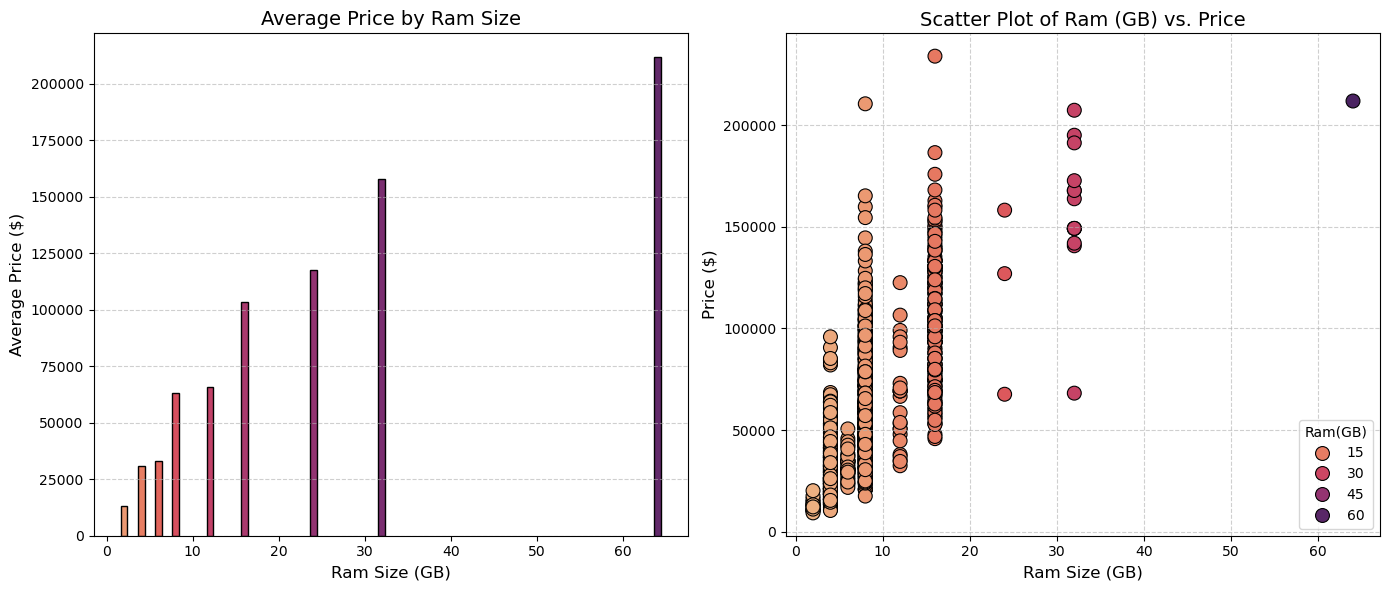

In [152]:

ram_avg_price = df.groupby('Ram(GB)')['Price'].mean()
palette = sns.color_palette("flare", len(ram_avg_price))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].bar(ram_avg_price.index, ram_avg_price.values, color=palette, edgecolor='black')
axes[0].set_title('Average Price by Ram Size', fontsize=14)
axes[0].set_xlabel('Ram Size (GB)', fontsize=12)
axes[0].set_ylabel('Average Price ($)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)


sns.scatterplot(data=df, x='Ram(GB)', y='Price', hue='Ram(GB)', palette='flare', s=100, edgecolor='black', ax=axes[1])
axes[1].set_title('Scatter Plot of Ram (GB) vs. Price', fontsize=14)
axes[1].set_xlabel('Ram Size (GB)', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show();

RAM size is a strong determinant of price—higher RAM laptops generally cost more. The jump from 16GB to 32GB RAM shows a major price increase, which could be due to premium models. There are some expensive outliers in lower RAM categories, suggesting that other factors (brand, GPU, CPU) also play a role in price. Most budget-friendly laptops have 8GB or less RAM, while high-end laptops often have 16GB or more.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Operating System Market Share:

- Create a pie chart or bar chart to show the distribution of laptops by OpSys.

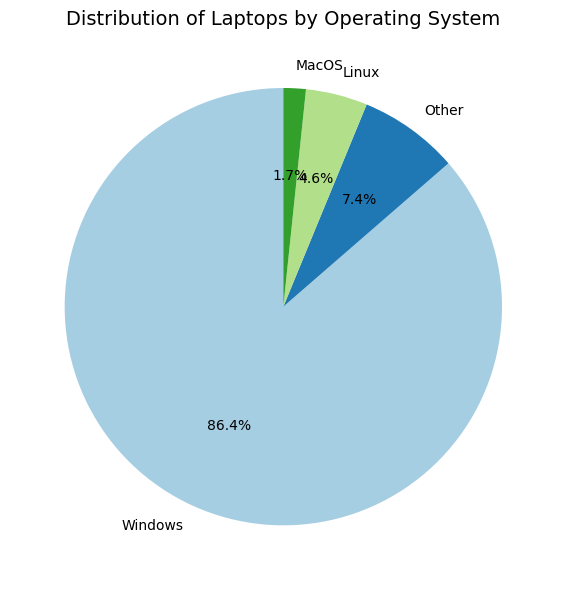

In [166]:

opsys_counts = df['OpSys_Grouped'].value_counts()
plt.figure(figsize=(8, 6))
opsys_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Laptops by Operating System', fontsize=14)
plt.ylabel('')  # Remove the y-label for better appearance
plt.tight_layout()
plt.show();

Windows Dominates (86.4%) .The vast majority of laptops in the dataset run Windows. This is expected, as most laptops from brands like Dell, Lenovo, HP, and Asus come pre-installed with Windows.
MacOS Holds a Small Share (7.4%)

<div class="alert alert-block alert-success">

### <span style=" color:red"> Weight Distribution:

- Plot a histogram to analyze the weight distribution of laptops.

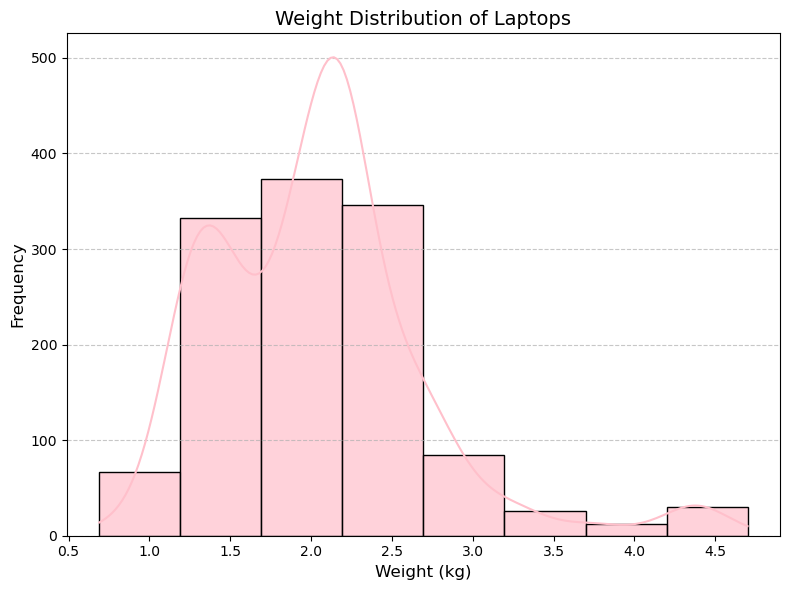

In [170]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Weight(kg)'], bins=8, kde=True, color='pink', edgecolor='black', alpha=0.7)
plt.title('Weight Distribution of Laptops', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

While most laptops are in the 1.5 - 2.5 kg range, there are fewer but significant heavier models that pull the distribution to the right.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Price Correlation Analysis:

- Compute and visualize the correlation between numerical columns (Inches, Weight, Ram, etc.) and Price.

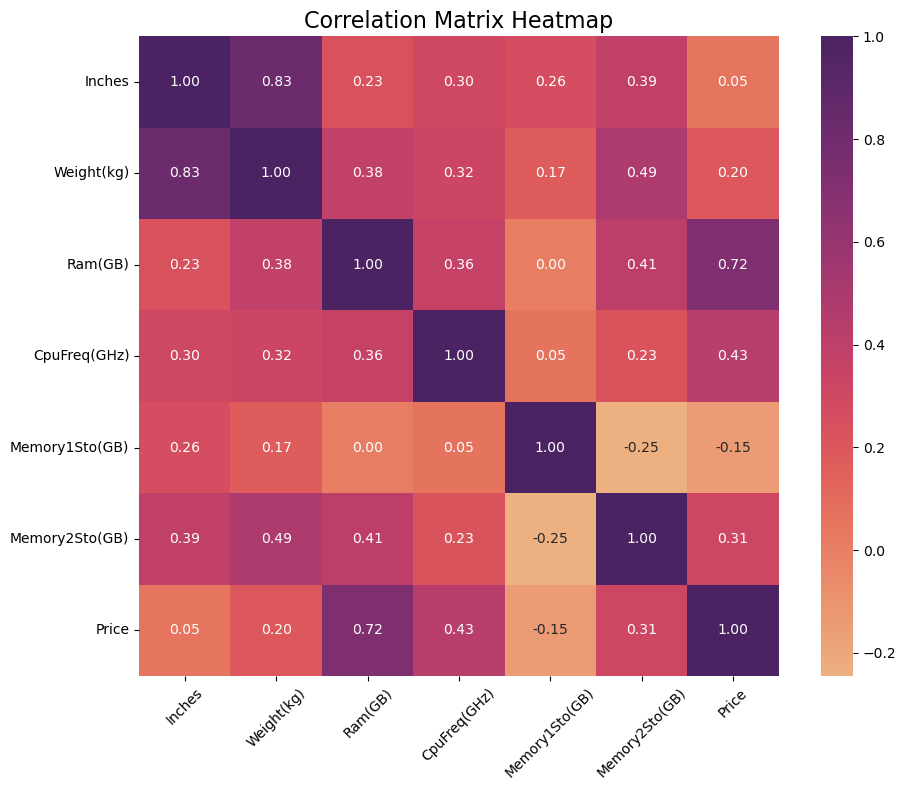

In [174]:

columns = ['Inches', 'Weight(kg)', 'Ram(GB)', 'CpuFreq(GHz)', 'Memory1Sto(GB)', 'Memory2Sto(GB)']
correlation_matrix = df[columns + ['Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,        # Show correlation coefficients on the heatmap
    fmt=".2f",         # Format the annotations to 2 decimal places
    cmap="flare",   # Color map for better visualization
    cbar=True,         # Display color bar
    square=True        # Make the heatmap cells square
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

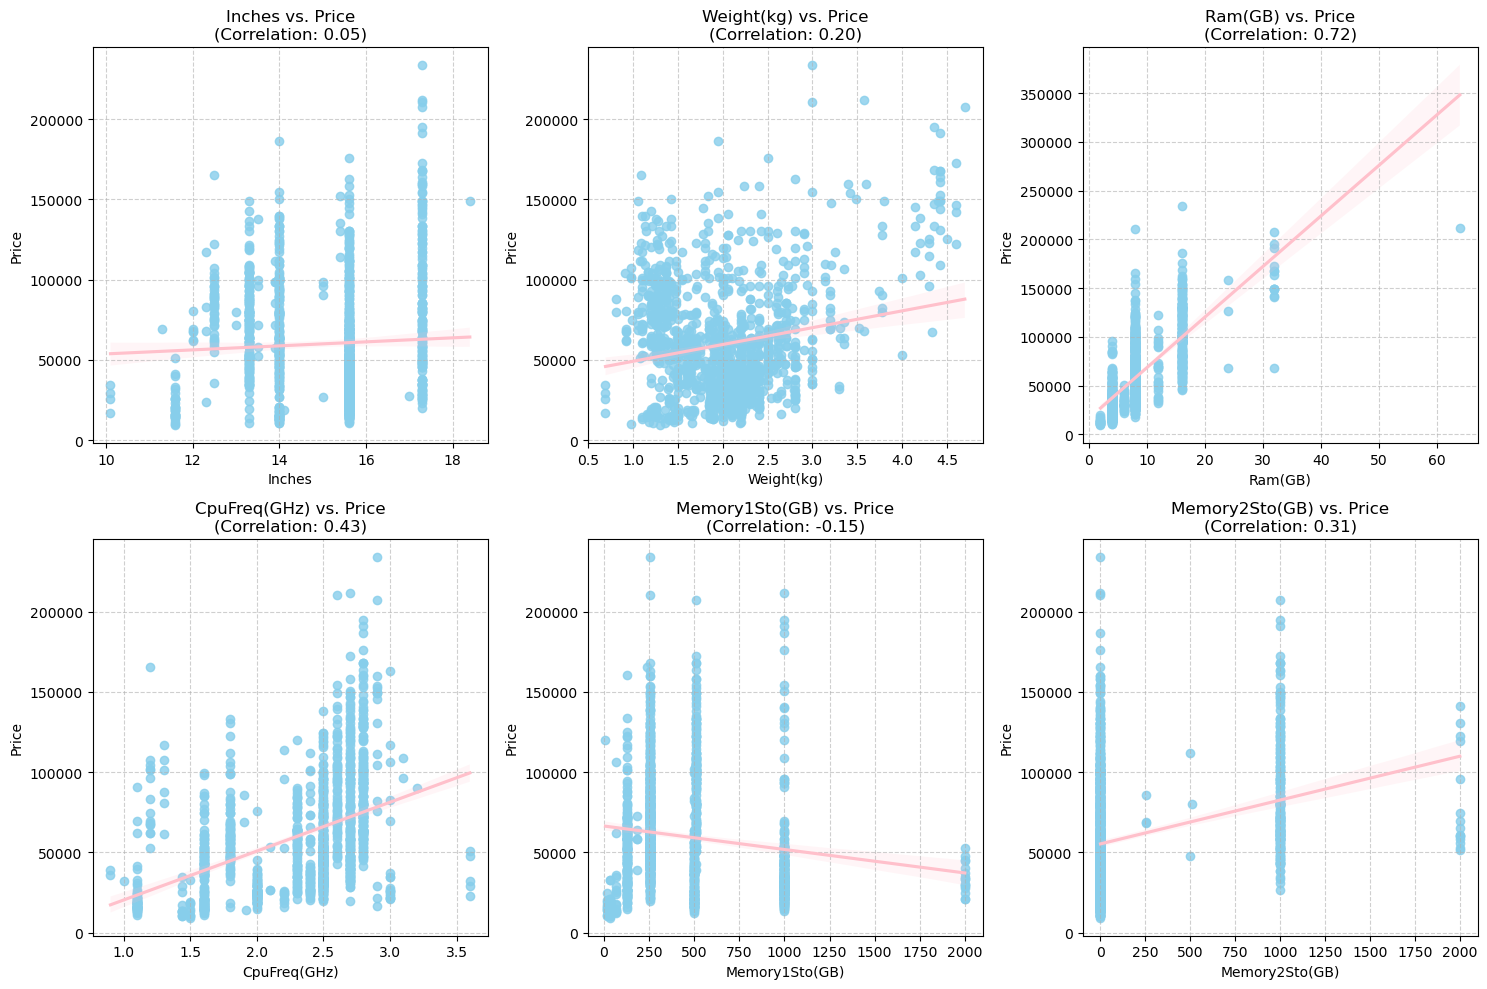

In [176]:

columns = ['Inches', 'Weight(kg)', 'Ram(GB)', 'CpuFreq(GHz)', 'Memory1Sto(GB)', 'Memory2Sto(GB)']
correlation_matrix = df[columns + ['Price']].corr()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.regplot(x=col, y='Price', data=df, ax=axes[i], color='skyblue', line_kws={'color': 'pink'})
    corr_value = correlation_matrix.loc[col, 'Price']  # Correlation from the matrix
    axes[i].set_title(f'{col} vs. Price\n(Correlation: {corr_value:.2f})', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Price', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

RAM vs. Price (0.72) → Strongest Positive Correlation. Laptops with more RAM tend to be significantly more expensive. High-end models (gaming/workstations) often have 32GB+ RAM, driving up prices.
CPU Frequency vs. Price (0.43) → Moderate Positive Correlation. Higher CPU frequency slightly increases price, but not as strongly as RAM.
Other factors like CPU generation and core count likely impact price more than GHz alone. Heavier laptops tend to be more expensive, likely due to premium gaming laptops with large cooling systems and batteries.

<div class="alert alert-block alert-success">

### <span style=" color:red"> ScreenResolution Impact on Price:

- Analyze how different resolution types (e.g., Full HD, 4K) affect the price.

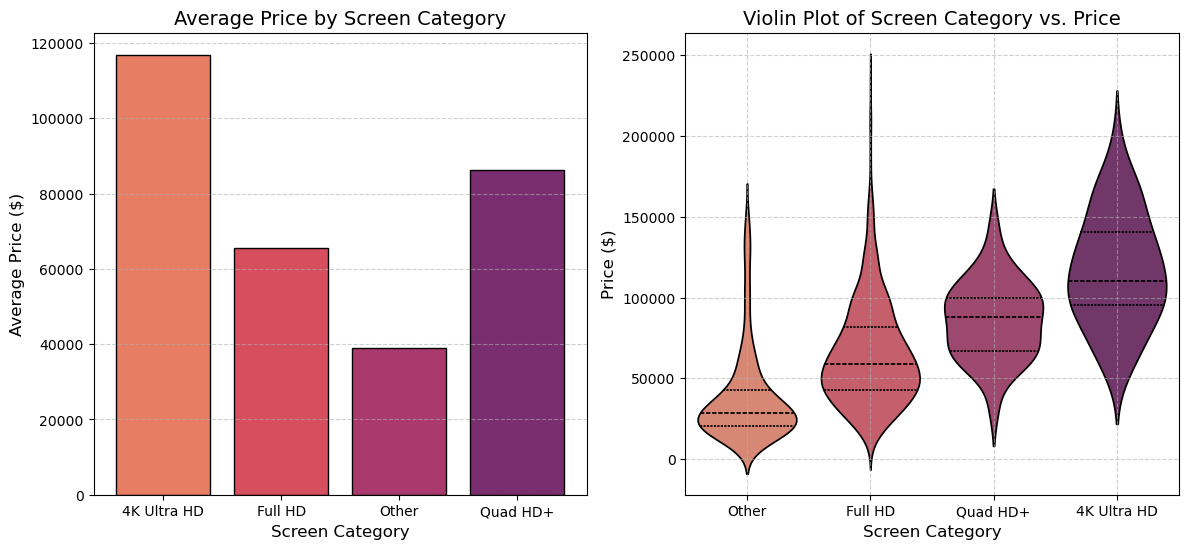

In [180]:

ScreenCategory_avg_price = df.groupby('ScreenCategory')['Price'].mean()
palette = sns.color_palette("flare", len(ScreenCategory_avg_price))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(ScreenCategory_avg_price.index, ScreenCategory_avg_price.values, color=palette, edgecolor='black')
axes[0].set_title('Average Price by Screen Category', fontsize=14)
axes[0].set_xlabel('Screen Category', fontsize=12)
axes[0].set_ylabel('Average Price ($)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.violinplot(data=df, x='ScreenCategory', y='Price', inner="quartile", palette='flare', edgecolor='black', ax=axes[1])
axes[1].set_title('Violin Plot of Screen Category vs. Price', fontsize=14)
axes[1].set_xlabel('Screen Category', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
plt.show();

Higher screen resolutions (4K Ultra HD, Quad HD+) lead to higher laptop prices. Full HD is the most common and affordable category. Screen resolution alone is not the only factor affecting price—other components (GPU, CPU, RAM) likely contribute.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Top CPU/GPU Manufacturers:

- Extract and visualize the most common CPU and GPU manufacturers.

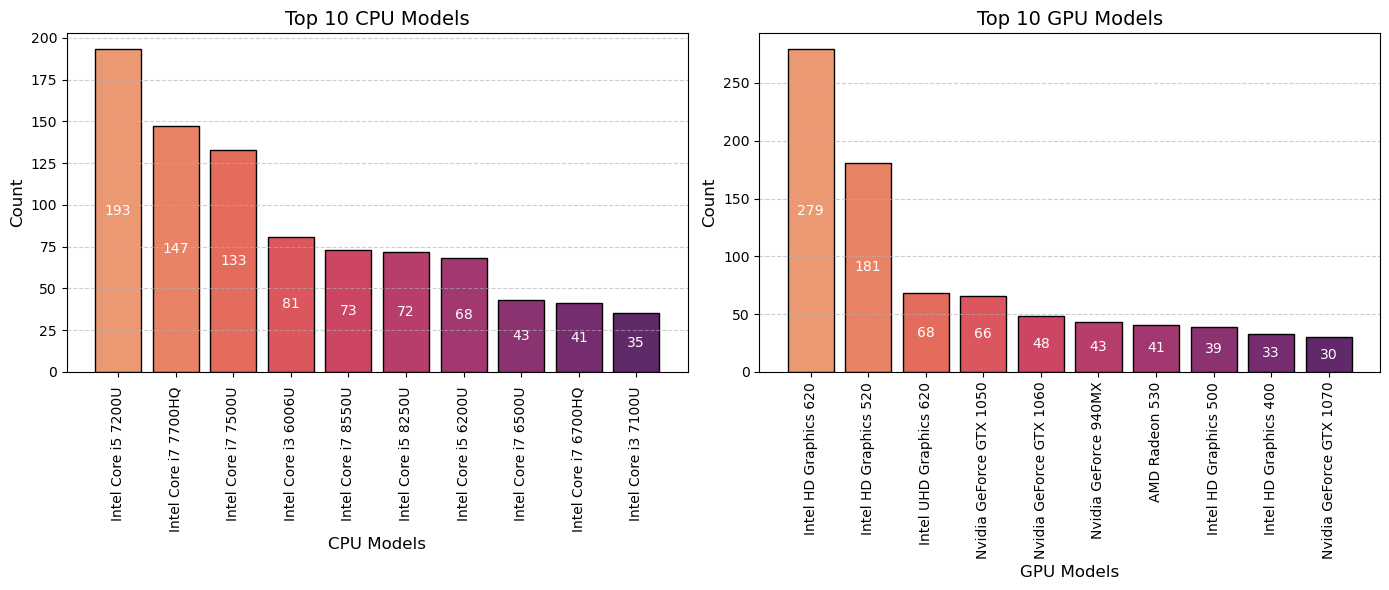

In [186]:
Cpu_top10 = df["Cpu"].value_counts()[:10]
Gpu_top10 = df["Gpu"].value_counts()[:10]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
palette = sns.color_palette("flare", len(Cpu_top10))
bars_cpu = axes[0].bar(Cpu_top10.index, Cpu_top10.values, color=palette, edgecolor='black')
axes[0].set_title('Top 10 CPU Models', fontsize=14)
axes[0].set_xlabel('CPU Models', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars_cpu:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height / 2,  # Barın ortasına
                 f'{int(height)}', ha='center', va='center', fontsize=10, color='white')


palette = sns.color_palette("flare", len(Gpu_top10))
bars_gpu = axes[1].bar(Gpu_top10.index, Gpu_top10.values, color=palette, edgecolor='black')
axes[1].set_title('Top 10 GPU Models', fontsize=14)
axes[1].set_xlabel('GPU Models', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars_gpu:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height / 2,  # Barın ortasına
                 f'{int(height)}', ha='center', va='center', fontsize=10, color='white')


plt.tight_layout()
plt.show()


The most common CPUs are mid-range Intel i5 and i7 models, commonly used in everyday laptops. Integrated GPUs dominate the dataset,

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM Analysis:

- Identify the most common RAM configurations and their respective average prices.

In [190]:
ram_counts = df['Ram(GB)'].value_counts()
ram_avg_price = df.groupby('Ram(GB)')['Price'].mean()
ram_summary = pd.DataFrame({
    'Count': ram_counts,
    'Average Price': ram_avg_price
}).sort_index()

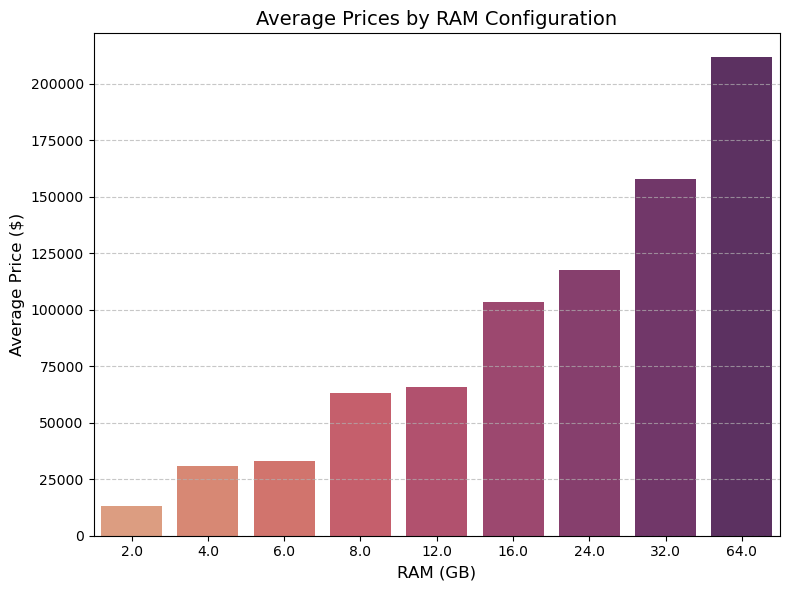

In [192]:
plt.figure(figsize=(8, 6))
sns.barplot(x=ram_summary.index, y=ram_summary['Average Price'], palette='flare')
plt.title('Average Prices by RAM Configuration', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


RAM is a major factor in laptop pricing, with higher RAM configurations found in expensive, high-performance laptops. The price jump from 16GB to 32GB suggests a shift from mid-range to high-end laptops. Most budget laptops have 4GB or 8GB RAM, aligning with mainstream consumer needs.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Memory Type and Price Relationship:

- Analyze the impact of memory type (e.g., HDD, SSD, Hybrid) on the price.

In [196]:
def combine_memory_types(row):
    types = set()
    if isinstance(row['Memory1Type'], str):
        types.add(row['Memory1Type'])
    if isinstance(row['Memory2Type'], str):
        types.add(row['Memory2Type'])
    return ' + '.join(sorted(types)) if types else 'Unknown'

df['MemoryConfiguration'] = df.apply(combine_memory_types, axis=1)

memory_summary = df.groupby('MemoryConfiguration').agg(
    Count=('Price', 'count'),
    AvgPrice=('Price', 'mean')
).sort_values(by='AvgPrice', ascending=False)

print(memory_summary)



                     Count       AvgPrice
MemoryConfiguration                      
Hybrid + SSD             2  159573.333600
FlashStorage + HDD       1  106187.040000
HDD + SSD              200   85964.959656
SSD                    632   69115.551972
Hybrid                   8   46669.816800
HDD                    358   35122.687964
FlashStorage            69   27831.170922


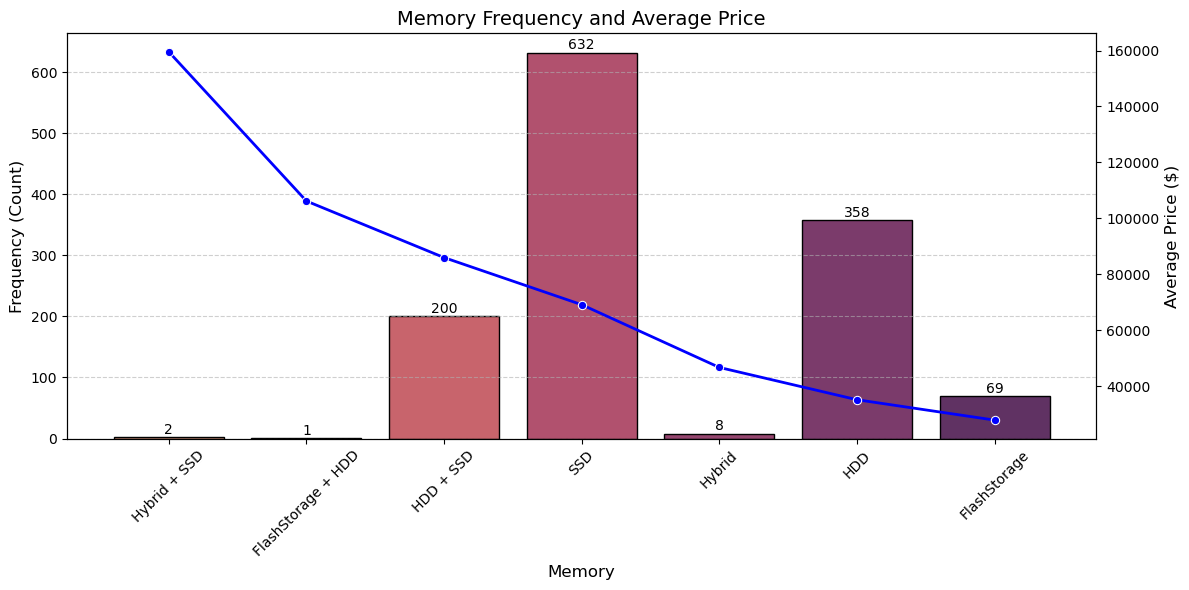

In [198]:

fig, ax1 = plt.subplots(figsize=(12, 6))

bar = sns.barplot(
    x=memory_summary.index, 
    y=memory_summary['Count'], 
    palette='flare', 
    edgecolor='black', 
    ax=ax1
)
ax1.set_ylabel('Frequency (Count)', fontsize=12, color='black')
ax1.set_xlabel('Memory', fontsize=12, color='black')
ax1.set_title('Memory Frequency and Average Price', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

for bar in ax1.patches:
    ax1.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.5, 
        f'{int(bar.get_height())}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

ax2 = ax1.twinx()
sns.lineplot(
    x=memory_summary.index, 
    y=memory_summary['AvgPrice'], 
    marker='o', 
    color='blue', 
    linewidth=2, 
    ax=ax2
)
ax2.set_ylabel('Average Price ($)', fontsize=12, color='black')
ax2.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

SSD is the dominant storage option, found in most modern laptops. HDD-based laptops are cheaper, likely targeting budget consumers. Hybrid and Flash-based storage solutions are rare but expensive, indicating they are used in premium models. Storage type significantly influences price, with SSD-based models costing much more than HDD-only models.

<div class="alert alert-block alert-success">

### <span style=" color:red"> High-end Laptop Analysis:

- Define a "high-end" laptop (e.g., based on Price or specs) and analyze their characteristics.

In [202]:

high_end_threshold = 60000
X = df.drop(columns=['Price'])
y = df['Price']

categorical_cols = ["Company", "Resolution", "TypeName", "OpSys_Grouped", "TouchScreen", "CpuBrand", "GpuBrand"]
numerical_cols = ['Inches', 'Weight(kg)', 'Ram(GB)', 'CpuFreq(GHz)', 'Memory1Sto(GB)', 'Memory2Sto(GB)']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

y_pred_class = (y_pred > high_end_threshold).astype(int)

X_test['True Price'] = y_test
X_test['Predicted Price'] = y_pred
X_test['High-End Prediction'] = y_pred_class

print(X_test)


Mean Absolute Error: 10461.971550606082
Mean Squared Error: 224553436.39685208
R2 Score: 0.7843129805009295
      Company            TypeName  Inches  \
1218   Lenovo              Gaming    15.6   
1164       HP            Notebook    15.6   
423      Asus            Notebook    15.6   
979      Asus              Gaming    17.3   
795    Lenovo  2 in 1 Convertible    14.0   
...       ...                 ...     ...   
163    Lenovo              Gaming    15.6   
487      Dell            Notebook    15.6   
628      Asus  2 in 1 Convertible    13.3   
222   Toshiba           Ultrabook    13.3   
244    Lenovo  2 in 1 Convertible    13.9   

                               ScreenResolution                    Cpu  \
1218                IPS Panel Full HD 1920x1080  Intel Core i7 6700HQ    
1164                                   1366x768   Intel Core i5 6200U    
423                           Full HD 1920x1080   Intel Core i3 7100U    
979                           Full HD 1920x1080  Intel 

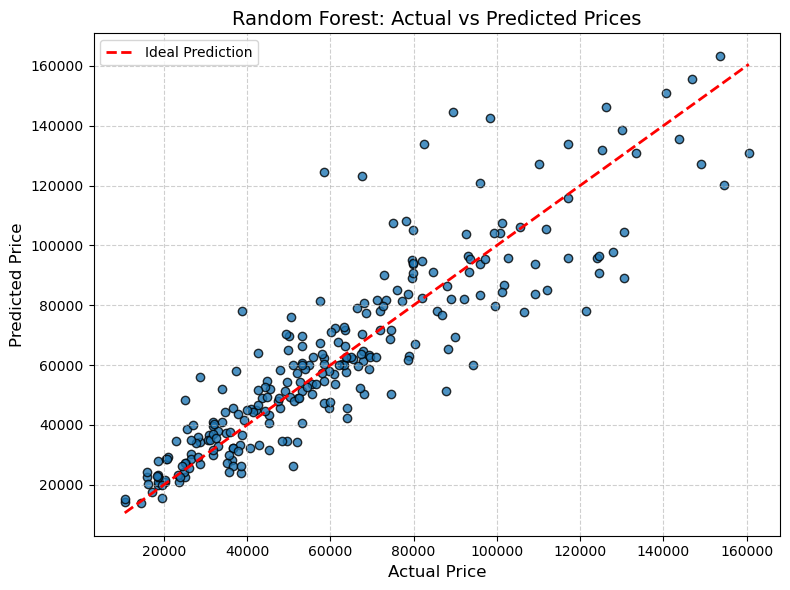

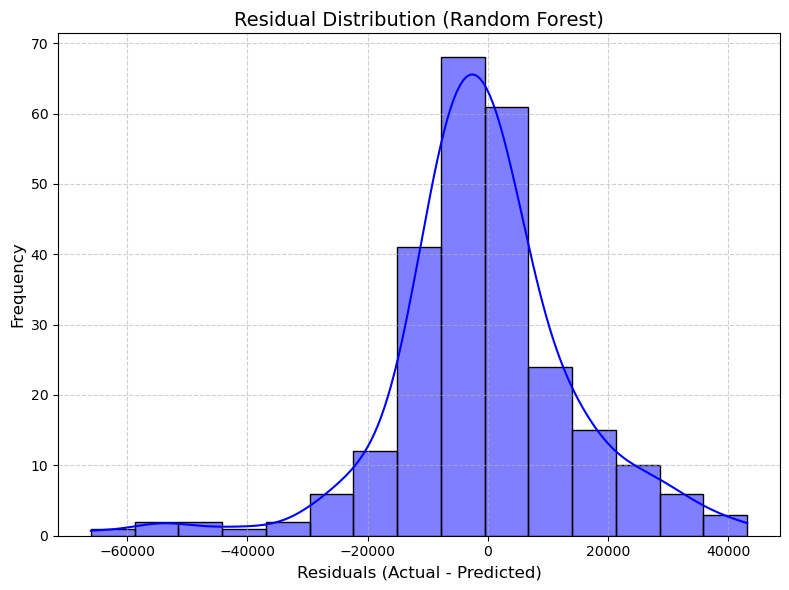

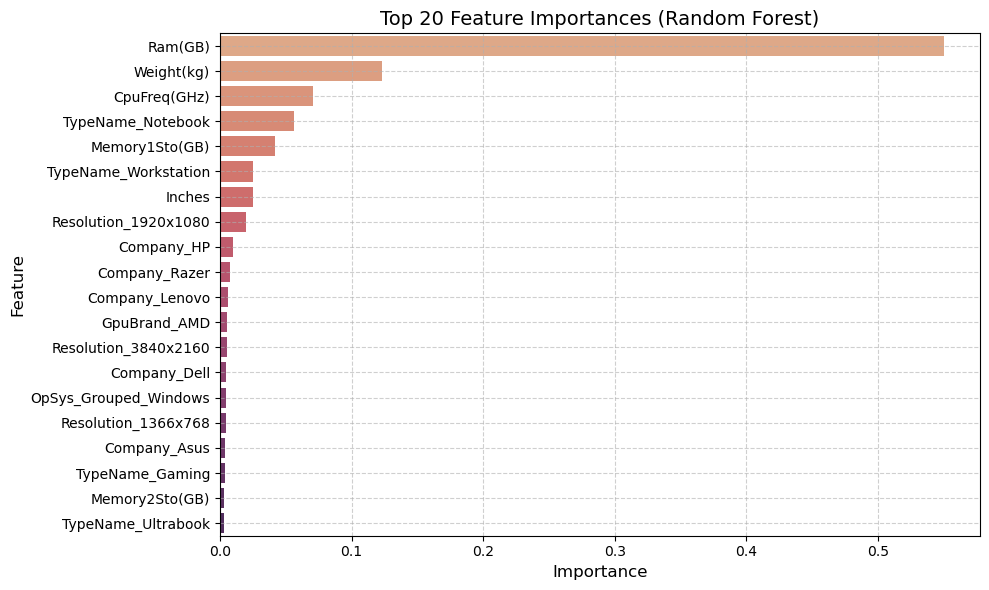

In [204]:

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.8, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction")
plt.title("Random Forest: Actual vs Predicted Prices", fontsize=14)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=15)
plt.title("Residual Distribution (Random Forest)", fontsize=14)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


feature_importances = pipeline_rf.named_steps['regressor'].feature_importances_
feature_names = preprocessor.transformers_[0][2] + list(
    pipeline_rf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
)

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


top_20_features = feature_importance_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='flare')
plt.title("Top 20 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The model performs well, but high-price laptops have more prediction errors. RAM, CPU, and Storage Type are the strongest predictors of laptop price. The normal residual distribution suggests minimal bias in the predictions.

<div class="alert alert-block alert-success">

### <span style=" color:red"> TypeName Analysis:

- Explore the distribution of TypeName and its relationship with price (e.g., Gaming vs Ultrabook).

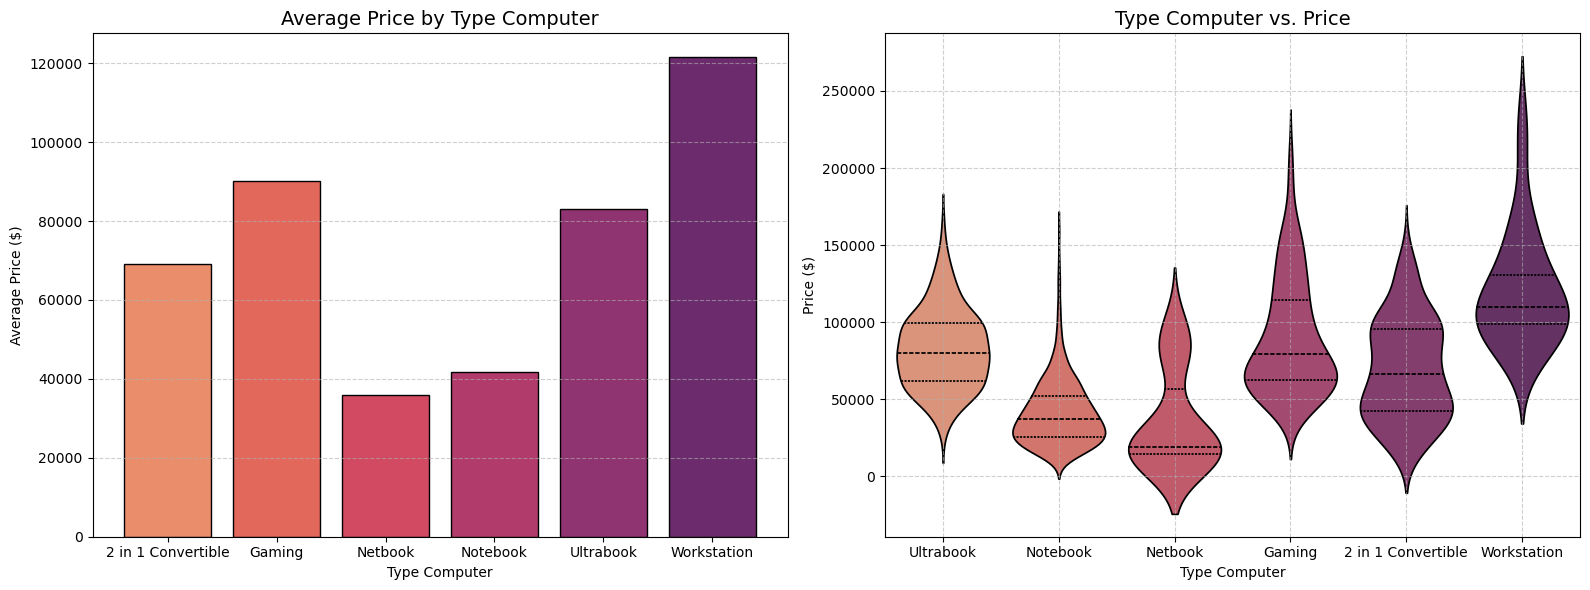

In [208]:

TypeName_avg_price = df.groupby('TypeName')['Price'].mean()
palette = sns.color_palette("flare", len(TypeName_avg_price))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].bar(TypeName_avg_price.index, TypeName_avg_price.values, color=palette, edgecolor='black')
axes[0].set_title('Average Price by Type Computer', fontsize=14)
axes[0].set_xlabel('Type Computer', fontsize=10)
axes[0].set_ylabel('Average Price ($)', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.violinplot(data=df, x='TypeName', y='Price', inner="quartile", palette='flare', edgecolor='black', ax=axes[1])
axes[1].set_title('Type Computer vs. Price', fontsize=14)
axes[1].set_xlabel('Type Computer', fontsize=10)
axes[1].set_ylabel('Price ($)', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show();

Workstations are the most expensive laptops, likely due to high-performance components (powerful CPUs, GPUs, and RAM).
Gaming laptops also show a wide range of prices, depending on GPU, cooling systems, and display refresh rates.
Netbooks and standard Notebooks are the most affordable categories, catering to basic users and students.
2-in-1 Convertibles are positioned between Ultrabooks and standard Notebooks, suggesting that hybrid designs add some cost but not as much as Workstations or Gaming laptops.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.

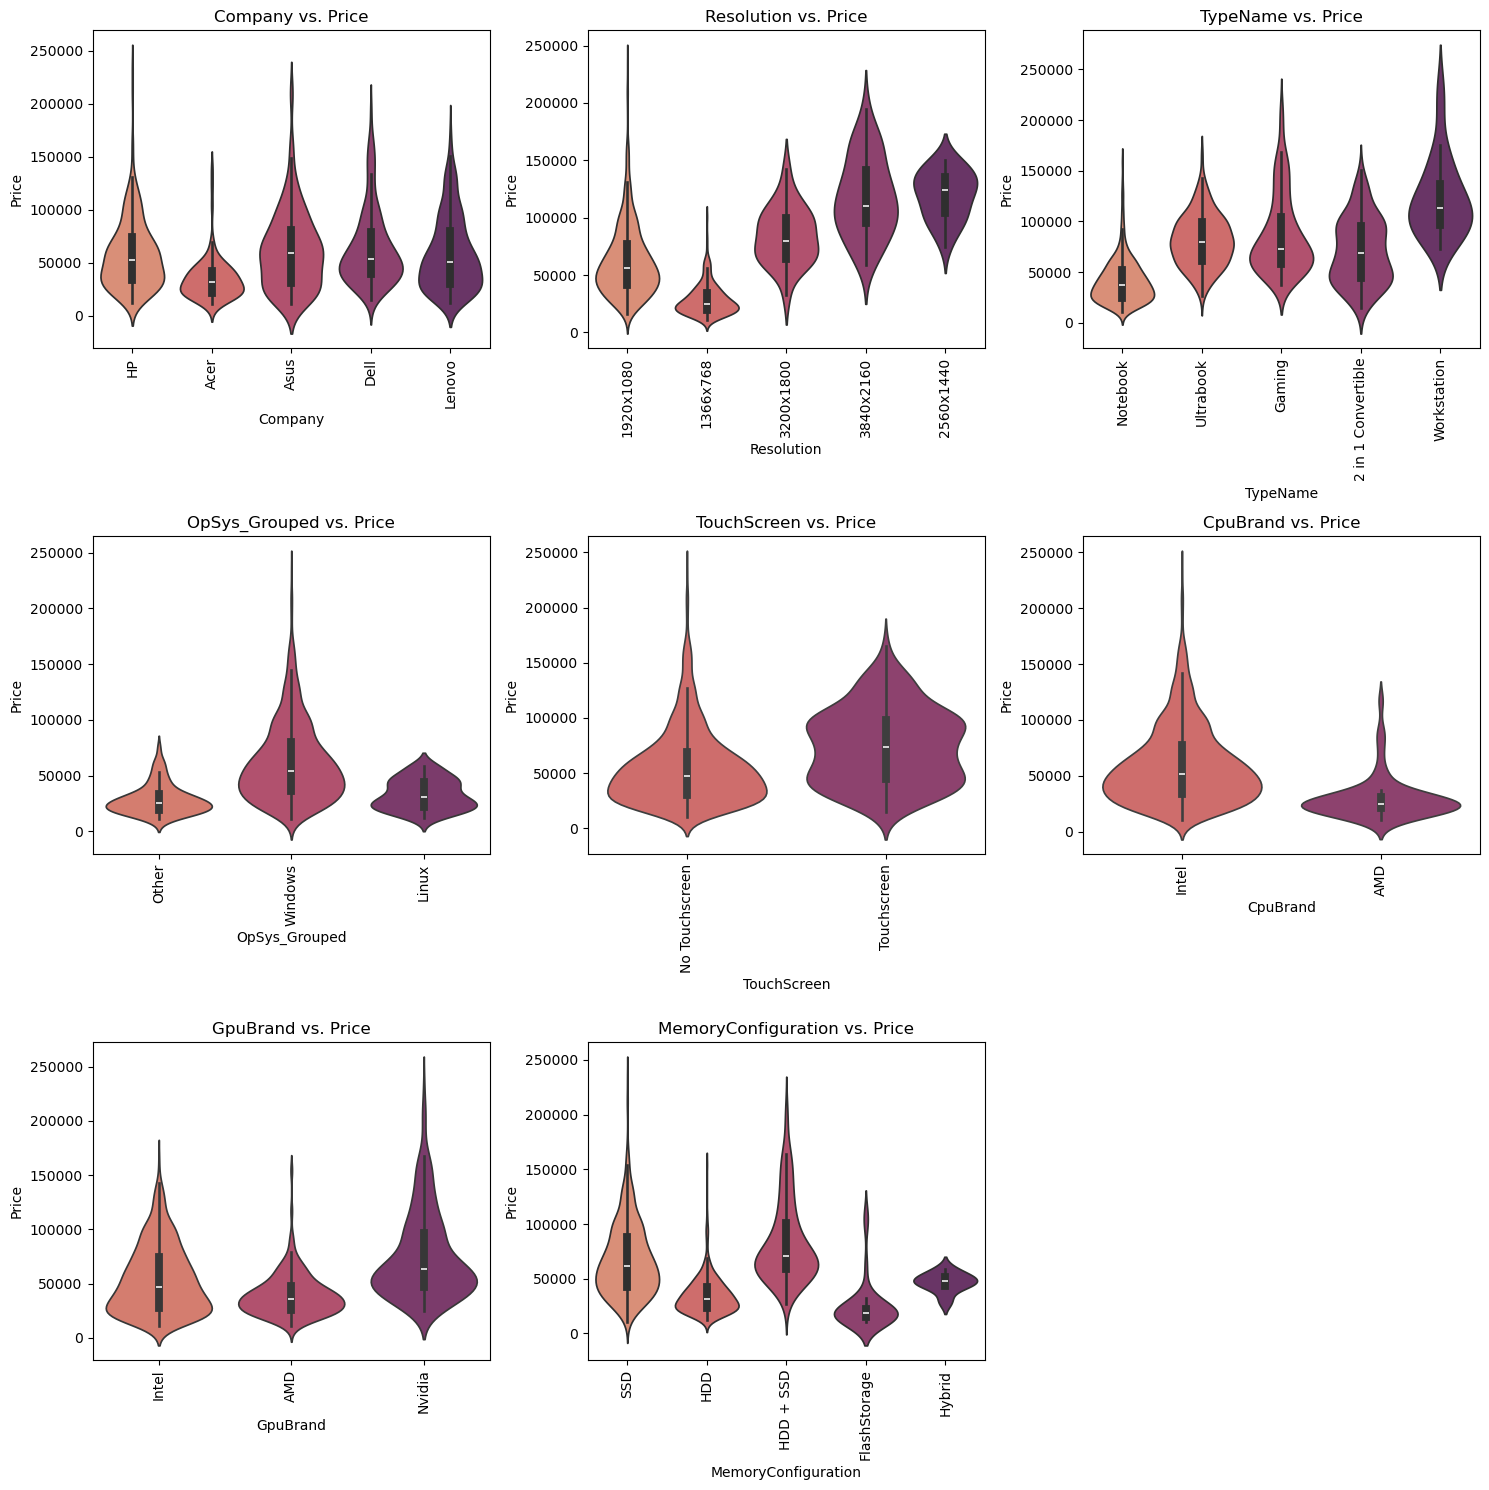

In [219]:

columns = ["Company", "Resolution", "TypeName", "OpSys_Grouped", "TouchScreen", "CpuBrand", "GpuBrand", "MemoryConfiguration"]

filtered_df = df.copy()  
for col in columns:
    top_categories = filtered_df[col].value_counts().index[:5]  # En sık görülen 5 kategoriyi seç
    filtered_df = filtered_df[filtered_df[col].isin(top_categories)]

num_columns = 3  
num_rows = math.ceil(len(columns) / num_columns)


fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.violinplot(x=col, y='Price', data=filtered_df, ax=axes[i], palette='flare')
    axes[i].set_title(f'{col} vs. Price', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Price', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();


Apple, Dell, and Lenovo have higher price distributions, whereas Acer and Asus focus more on budget-friendly models. Screen resolution significantly affects price. 4K and high-res screens are found in premium laptops. Hardware components (CPU, GPU, RAM, Storage) are major price drivers. Intel CPUs, NVIDIA GPUs, and SSD storage consistently correlate with higher prices. Workstations and Gaming Laptops are the most expensive categories. Netbooks and Notebooks remain the most affordable options.

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

**Laptop Price Analysis Summary**

This study examines the relationship between **laptop prices** and various variables. The dataset consists of laptops from different brands, technical specifications, and operating systems. Below is a summary of the key findings:

### 1. **Price Distribution**
- According to the histogram graph, laptop prices exhibit a wide distribution with concentrations in certain price ranges.
- The boxplot analysis indicates the presence of some outliers and shows that the price distribution is not symmetric.

### 2. **Price Differences by Features**
- **Price by Brand:** The price distributions for the top five most popular brands were analyzed. Some brands are positioned in a higher price segment compared to others.
- **Price by Screen Resolution:** Laptops with higher resolution screens tend to be more expensive.
- **Price by Processor Brand:** A comparison of Intel and AMD processors reveals that certain processor series significantly impact prices.
- **Price by Memory Configuration:** Memory configurations (e.g., SSD vs. HDD) have a significant effect on laptop prices.

### 3. **Impact of Operating System and Touchscreen Feature**
- **Operating System:** While Windows-based laptops are available in a wide price range, MacOS devices are positioned in a higher price segment.
- **Touchscreen Feature:** Laptops with touchscreen functionality tend to be more expensive on average.

This analysis provides valuable insights into the key factors influencing laptop prices. For more in-depth analysis, different modeling techniques can be applied, and linear relationships between variables can be examined.



# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |